<a href="https://colab.research.google.com/github/piikkkuuuu/ProgrammingAssignment2/blob/master/Prodigy_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Titanic Dataset Analysis ---

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

🧹 Missing Values (Before Cle

/tmp/ipython-input-1-1920220731.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-1-1920220731.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

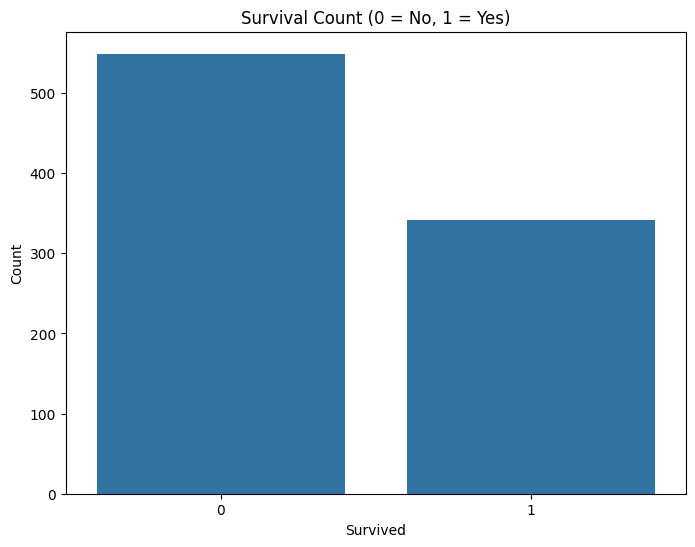

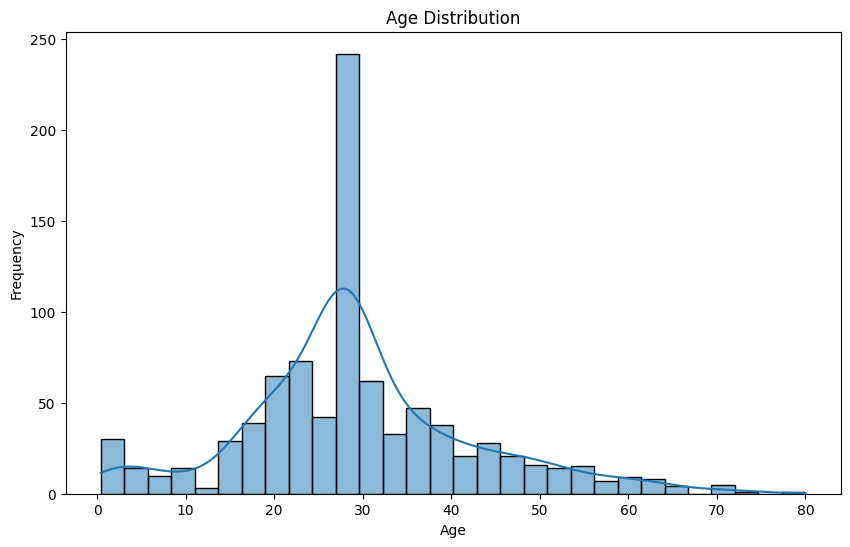

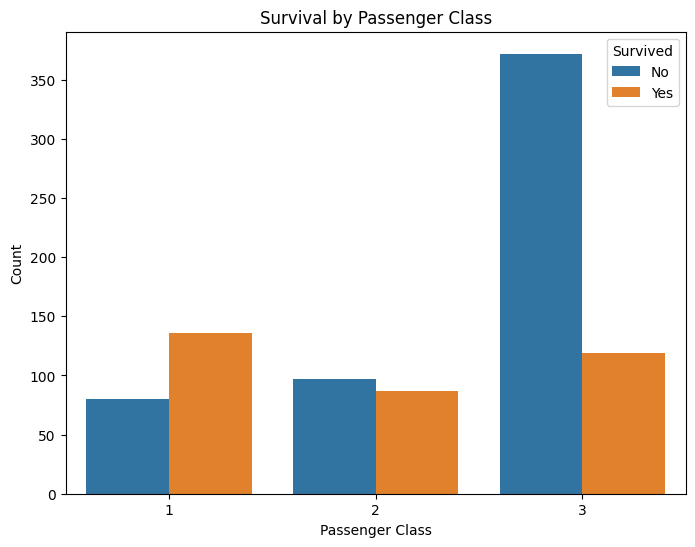

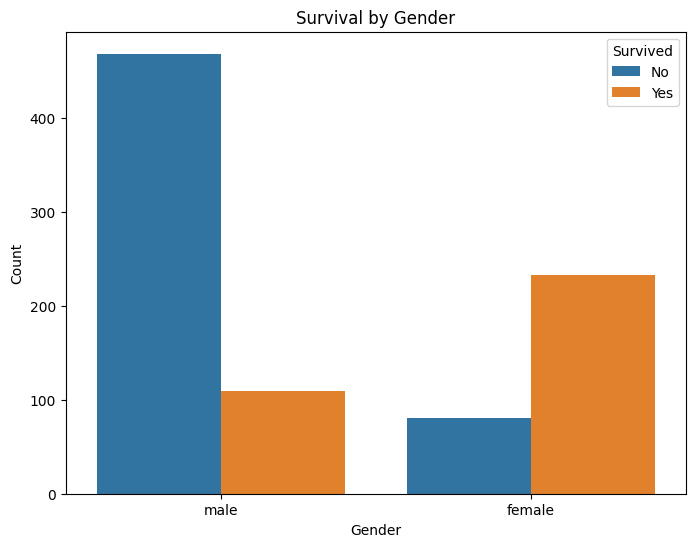

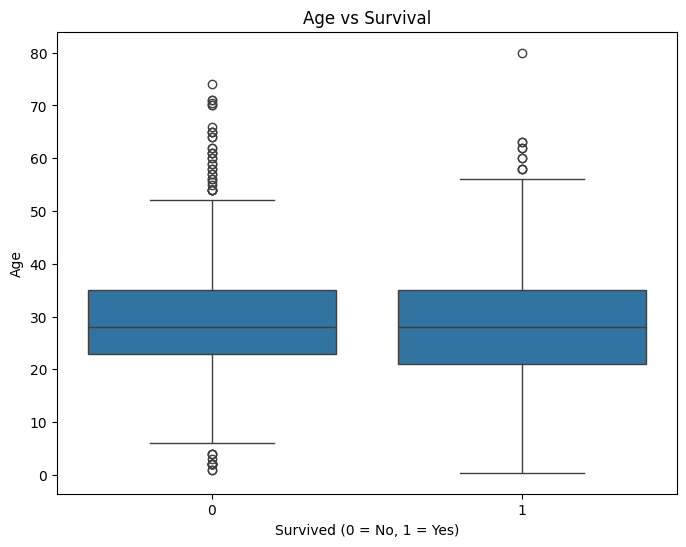

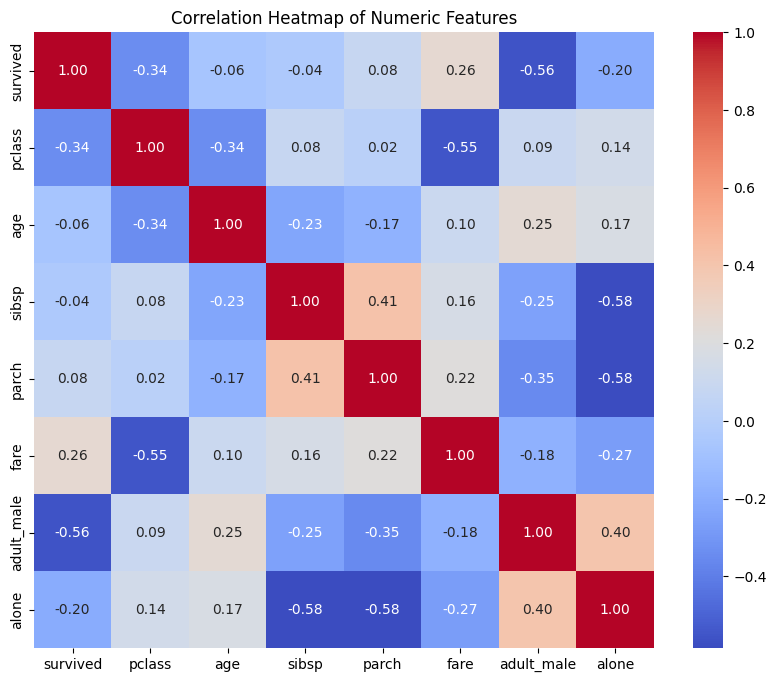


📊 Survival Rates by Gender and Class:
pclass         1         2         3
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
# You can also use pd.read_csv('your_path/titanic.csv') if you have a local file
df = sns.load_dataset('titanic')

print("--- Titanic Dataset Analysis ---")

# Basic Information
print("\n🔍 Dataset Info:")
# Display concise summary of the DataFrame, including data types and non-null values
df.info()

print("\n🧹 Missing Values (Before Cleaning):")
# Show the count of missing values for each column
print(df.isnull().sum())

# Data Cleaning
# Fill missing 'age' with the median value of the 'age' column
df['age'].fillna(df['age'].median(), inplace=True)
# Fill missing 'embarked' with the most frequent value (mode) of the 'embarked' column
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# Drop 'deck' column due to a high number of missing values, making it less useful for analysis
df.drop(columns=['deck'], inplace=True)

# Verify missing values again after cleaning
print("\n✅ Missing Values (After Cleaning):")
print(df.isnull().sum())

# Univariate Analysis

# Plot 1: Survival Count
plt.figure(figsize=(8, 6)) # Set the figure size for better readability
sns.countplot(x='survived', data=df) # Create a bar plot of 'survived' column
plt.title('Survival Count (0 = No, 1 = Yes)') # Set the title of the plot
plt.xlabel('Survived') # Label for x-axis
plt.ylabel('Count') # Label for y-axis
plt.show() # Display the plot

# Plot 2: Age Distribution
plt.figure(figsize=(10, 6)) # Set the figure size
sns.histplot(df['age'], bins=30, kde=True) # Create a histogram of 'age' with 30 bins and a KDE curve
plt.title('Age Distribution') # Set the title
plt.xlabel('Age') # Label for x-axis
plt.ylabel('Frequency') # Label for y-axis
plt.show() # Display the plot

# Multivariate Analysis

# Plot 3: Survival by Passenger Class
plt.figure(figsize=(8, 6)) # Set the figure size
# Create a count plot of 'pclass' with 'survived' as hue, showing survival rates per class
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival by Passenger Class') # Set the title
plt.xlabel('Passenger Class') # Label for x-axis
plt.ylabel('Count') # Label for y-axis
plt.legend(title='Survived', labels=['No', 'Yes']) # Add a legend
plt.show() # Display the plot

# Plot 4: Survival by Gender
plt.figure(figsize=(8, 6)) # Set the figure size
# Create a count plot of 'sex' with 'survived' as hue, showing survival rates by gender
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival by Gender') # Set the title
plt.xlabel('Gender') # Label for x-axis
plt.ylabel('Count') # Label for y-axis
plt.legend(title='Survived', labels=['No', 'Yes']) # Add a legend
plt.show() # Display the plot

# Plot 5: Age vs Survival (Box Plot)
plt.figure(figsize=(8, 6)) # Set the figure size
# Create a box plot to show the distribution of 'age' for survived vs. not survived passengers
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age vs Survival') # Set the title
plt.xlabel('Survived (0 = No, 1 = Yes)') # Label for x-axis
plt.ylabel('Age') # Label for y-axis
plt.show() # Display the plot

# Correlation Heatmap (numeric features only)
plt.figure(figsize=(10, 8)) # Set the figure size
# Calculate the correlation matrix for numeric columns and plot it as a heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features') # Set the title
plt.show() # Display the plot

# Pivot Table: Survival rate by class and gender
# Create a pivot table to show the mean survival rate grouped by 'sex' and 'pclass'
pivot = df.pivot_table(index='sex', columns='pclass', values='survived')
print("\n📊 Survival Rates by Gender and Class:")
print(pivot)

# Pairplot (Optional - high-dimensional analysis)
# This plot can take a while to generate for large datasets.
# It creates scatter plots for all pairs of numerical features,
# with hue indicating survival status.
# plt.figure(figsize=(12, 10)) # Set figure size if uncommented
# sns.pairplot(df[['age', 'fare', 'pclass', 'survived']], hue='survived', diag_kind='kde')
# plt.suptitle('Pairplot of Key Numeric Features by Survival Status', y=1.02) # Add a suptitle
# plt.show()